# Dimensionality Reduction with Eigenvector / Eigenvalues and Correlation Matrix (PCA)

inspired by http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#eigendecomposition---computing-eigenvectors-and-eigenvalues

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import linalg as LA

from sklearn import datasets

In [2]:
iris = datasets.load_iris()

First we need the correlation matrix

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
corr = df.corr()
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


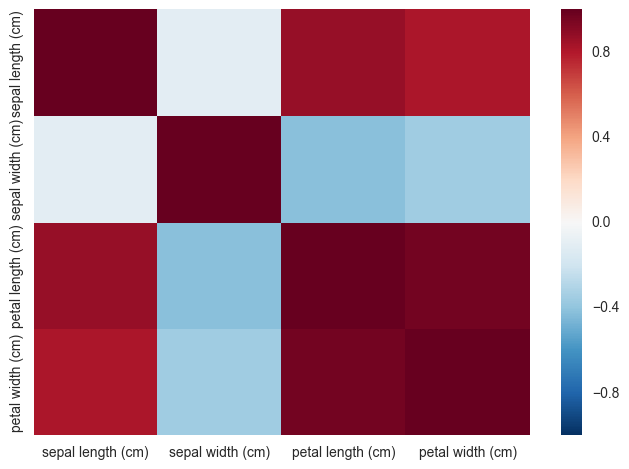

In [4]:
sns.heatmap(corr)

In [5]:
eig_vals, eig_vecs = LA.eig(corr)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)


Eigenvalues

In [6]:
pd.DataFrame([eig_vals])

,0,1,2,3
0,2.910818,0.921221,0.147353,0.020608


Eigenvector as Principal component

In [7]:
pd.DataFrame(eig_vecs)

,0,1,2,3
0,0.522372,-0.372318,-0.721017,0.261996
1,-0.263355,-0.925556,0.242033,-0.124135
2,0.581254,-0.021095,0.140892,-0.801154
3,0.565611,-0.065416,0.633801,0.523546


Create the projection matrix for a new two dimensional space

In [8]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(len(corr),1),
                      eig_pairs[1][1].reshape(len(corr),1)))


pd.DataFrame(matrix_w, columns=['PC1', 'PC2'])

,PC1,PC2
0,0.522372,-0.372318
1,-0.263355,-0.925556
2,0.581254,-0.021095
3,0.565611,-0.065416


In [9]:
new_dim = np.dot(np.array(iris.data), matrix_w)

df = pd.DataFrame(new_dim, columns=['X', 'Y'])
df['label'] = iris.target
df.head()


,X,Y,label
0,2.669231,-5.180887,0
1,2.696434,-4.643645,0
2,2.481163,-4.752183,0
3,2.571512,-4.626615,0
4,2.590658,-5.236211,0


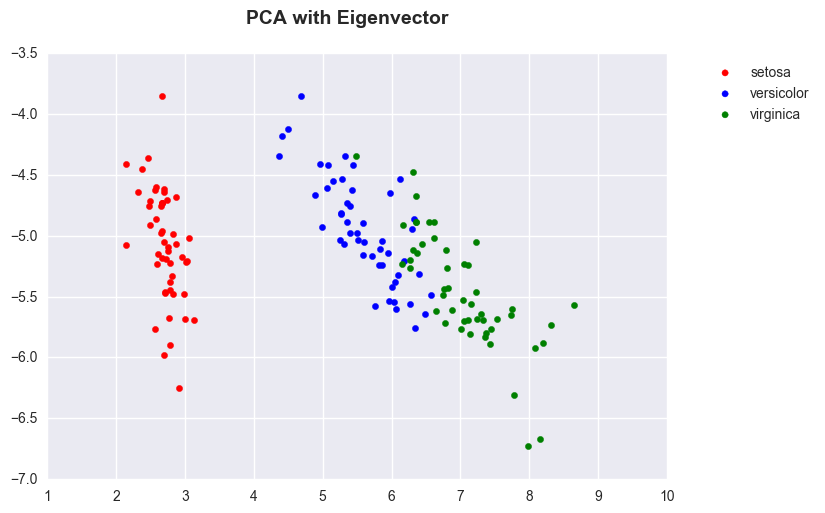

In [10]:
fig = plt.figure()
fig.suptitle('PCA with Eigenvector', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

plt.scatter(df[df.label == 0].X, df[df.label == 0].Y, color='red', label=iris.target_names[0])
plt.scatter(df[df.label == 1].X, df[df.label == 1].Y, color='blue', label=iris.target_names[1])
plt.scatter(df[df.label == 2].X, df[df.label == 2].Y, color='green', label=iris.target_names[2])

plt.legend(bbox_to_anchor=(1.25, 1))
